In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
giraffe_rates = pd.read_csv("giraffe_cumulative_rates.tsv", sep="\t", names=["minQ", "reads_mapped", "reads_mapped_correctly"])
giraffe_rates["aligner"] = "giraffe"
minimap_rates = pd.read_csv("minimap_cumulative_rates.tsv", sep="\t", names=["minQ", "reads_mapped", "reads_mapped_correctly"])
minimap_rates["aligner"] = "minimap"
df = pd.concat([giraffe_rates, minimap_rates], ignore_index=True)
df

,minQ,reads_mapped,reads_mapped_correctly,aligner
0,60,1828432,1813069,giraffe
1,59,1828819,1813380,giraffe
2,58,1829425,1813855,giraffe
3,57,1830088,1814386,giraffe
4,56,1830381,1814617,giraffe
...,...,...,...,...
117,4,1867944,1828871,minimap
118,3,1868829,1829188,minimap
119,2,1869774,1829494,minimap
120,1,1886973,1833152,minimap


In [12]:
df["percent_mapped"] = df.reads_mapped/2e6 * 100
df["percent_mapped_correctly"] = df.reads_mapped_correctly/df.reads_mapped * 100
df["percent_total_correct"] = df.reads_mapped_correctly/2e6 * 100
df

,minQ,reads_mapped,reads_mapped_correctly,aligner,percent_mapped,percent_mapped_correctly,percent_total_correct
0,60,1828432,1813069,giraffe,91.42160,99.159772,90.65345
1,59,1828819,1813380,giraffe,91.44095,99.155794,90.66900
2,58,1829425,1813855,giraffe,91.47125,99.148913,90.69275
3,57,1830088,1814386,giraffe,91.50440,99.142008,90.71930
4,56,1830381,1814617,giraffe,91.51905,99.138759,90.73085
...,...,...,...,...,...,...,...
117,4,1867944,1828871,minimap,93.39720,97.908235,91.44355
118,3,1868829,1829188,minimap,93.44145,97.878832,91.45940
119,2,1869774,1829494,minimap,93.48870,97.845729,91.47470
120,1,1886973,1833152,minimap,94.34865,97.147760,91.65760


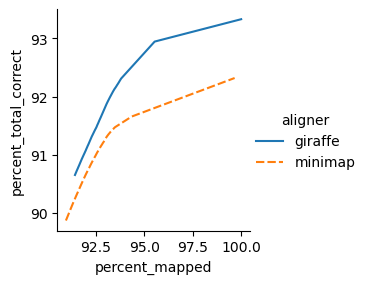

In [33]:
sns.relplot(df, kind="line", x="percent_mapped", y="percent_total_correct", hue="aligner", style="aligner", height=3, aspect=1)
plt.savefig("percent_mapped.pdf")

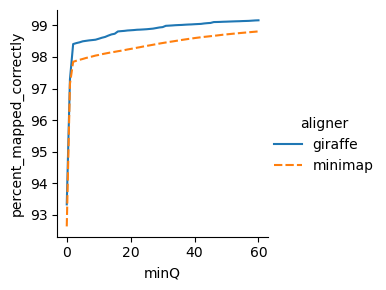

In [34]:
sns.relplot(df, kind="line", x="minQ", y="percent_mapped_correctly", hue="aligner", style="aligner", height=3, aspect=1)
plt.savefig("minQ.pdf")